# Laplace equation on a disk
## Problem setup
We will solve a Laplace equation in a polar coordinate system:

$$
r\frac{dy}{dr} + r^2\frac{dy^2}{dr^2} + \frac{dy^2}{d\theta^2} = 0,  \qquad r \in [0, 1], \quad \theta \in [0, 2\pi]
$$

with the Dirichlet boundary condition

$$
y(1,\theta) = \cos(\theta)
$$

and the periodic boundary condition

$$
y(r, \theta +2\pi) = y(r, \theta).
$$

The reference solution is $y=r\cos(\theta)$.

# Dimensional Analysis for the Laplace Equation on a Disk

## Problem Setup

We will solve the Laplace equation in a polar coordinate system:

$$
r\frac{dy}{dr} + r^2\frac{d^2y}{dr^2} + \frac{d^2y}{d\theta^2} = 0, \qquad r \in [0, 1], \quad \theta \in [0, 2\pi]
$$

with the Dirichlet boundary condition:

$$
y(1,\theta) = \cos(\theta)
$$

and the periodic boundary condition:

$$
y(r, \theta + 2\pi) = y(r, \theta).
$$

The reference solution is:

$$
y = r\cos(\theta).
$$

---

## Dimensional Analysis

### Step 1: Assign Dimensions to Variables

1. **Radial Coordinate $r$:**
   - The dimension of $r$ is length:

     $$
     [r] = L.
     $$

2. **Angular Coordinate $\theta$:**
   - The dimension of $\theta$ is dimensionless:

     $$
     [\theta] = 1.
     $$

3. **Solution $y$:**
   - The solution $y$ represents a physical quantity, which we assume to be in volts (V):

     $$
     [y] = V.
     $$

---

### Step 2: Analyze the Dimensions of Each Term

1. **First Derivative Term $r\frac{dy}{dr}$:**
   - The first derivative $\frac{dy}{dr}$ has dimensions:

     $$
     \left[\frac{dy}{dr}\right] = \frac{[y]}{[r]} = \frac{V}{L}.
     $$
   - Therefore, the term $r\frac{dy}{dr}$ has dimensions:

     $$
     \left[r\frac{dy}{dr}\right] = [r] \cdot \frac{V}{L} = L \cdot \frac{V}{L} = V.
     $$

2. **Second Derivative Term $r^2\frac{d^2y}{dr^2}$:**
   - The second derivative $\frac{d^2y}{dr^2}$ has dimensions:

     $$
     \left[\frac{d^2y}{dr^2}\right] = \frac{[y]}{[r]^2} = \frac{V}{L^2}.
     $$
   - Therefore, the term $r^2\frac{d^2y}{dr^2}$ has dimensions:

     $$
     \left[r^2\frac{d^2y}{dr^2}\right] = [r]^2 \cdot \frac{V}{L^2} = L^2 \cdot \frac{V}{L^2} = V.
     $$

3. **Second Derivative Term $\frac{d^2y}{d\theta^2}$:**
   - The second derivative $\frac{d^2y}{d\theta^2}$ has dimensions:

     $$
     \left[\frac{d^2y}{d\theta^2}\right] = \frac{[y]}{[\theta]^2} = \frac{V}{1^2} = V.
     $$

---

### Step 3: Verify Dimensional Consistency

The Laplace equation in polar coordinates is:

$$
r\frac{dy}{dr} + r^2\frac{d^2y}{dr^2} + \frac{d^2y}{d\theta^2} = 0.
$$

Each term in the equation has dimensions of $V$:

- $r\frac{dy}{dr}$: $V$
- $r^2\frac{d^2y}{dr^2}$: $V$
- $\frac{d^2y}{d\theta^2}$: $V$

Since all terms have the same dimensions, the equation is dimensionally consistent.

---

### Step 4: Summary of Dimensions

| Variable/Parameter     | Physical Meaning                   | Dimensions            |
|------------------------|-----------------------------------|-----------------------|
| $r$                   | Radial coordinate                 | $L$                 |
| $\theta$              | Angular coordinate                | $1$ (dimensionless) |
| $y$                   | Solution (e.g., voltage)          | $V$                 |

---

### Step 5: Initial and Boundary Conditions

1. **Boundary Condition $y(1,\theta) = \cos(\theta)$:**
   - The boundary condition $y(1,\theta) = \cos(\theta)$ is given in volts:
   
     $$
     [y(1,\theta)] = V.
     $$
   - The term $\cos(\theta)$ is dimensionless because $\theta$ is dimensionless.

2. **Periodic Boundary Condition $y(r, \theta + 2\pi) = y(r, \theta)$:**
   - The periodic boundary condition ensures that the solution is periodic in $\theta$ with period $2\pi$.
   - Since $\theta$ is dimensionless, the condition is dimensionally consistent.


## Implementation
This description goes through the implementation of a solver for the above described Heat equation step-by-step.

First, import the libraries we need:

In [1]:
import brainstate as bst
import brainunit as u
import numpy as np

import deepxde.experimental as deepxde

We begin by defining a computational geometry. We can use a built-in class `Rectangle` as follows

In [2]:
geom = deepxde.geometry.Rectangle(
    xmin=[0, 0],
    xmax=[1, 2 * np.pi],
).to_dict_point(r=u.meter, theta=u.radian)

Next, we express the PDE residual of the Laplace equation:

In [3]:
def pde(x, y):
    jacobian = net.jacobian(x)
    hessian = net.hessian(x)

    dy_r = jacobian["y"]["r"]
    dy_rr = hessian["y"]["r"]["r"]
    dy_thetatheta = hessian["y"]["theta"]["theta"]
    return x['r'] * dy_r + x['r'] ** 2 * dy_rr + dy_thetatheta

The first argument to `pde` is 2-dimensional vector where the first component(`x[:,0:1]`) is $r$-coordinate and the second componenet (`x[:,1:]`) is the $\theta$-coordinate. The second argument is the network output, i.e., the solution $y(r, \theta)$.

Next, we consider the Dirichlet boundary condition. We need to implement a function, which should return `True` for points inside the subdomain and `False` for the points outside. In our case, if the points satisfy $r=1$ and are on the whole boundary of the rectangle domain, then function `boundary` returns `True`. Otherwise, it returns `False`. (Note that because of rounding-off errors, it is often wise to use u.math.allclose to test whether two floating point values are equivalent.)

In [4]:
def boundary(x, on_boundary):
    return on_boundary and u.math.allclose(x['r'], 1)

The argument `x` to `boundary` is the network input and is a $d$-dim vector, where $d$ is the dimension and $d=2$ in this case. To facilitate the implementation of `boundary`, a boolean `on_boundary` is used as the second argument. If the point $r,\theta$ (the first argument) is on the entire boundary of the rectangle geometry that created above, then `on_boundary` is `True`, otherwise, `on_boundary` is False.

Using a lambda funtion, the `boundary` we defined above can be passed to `DirichletBC` as the second argument. Thus, the Dirichlet boundary condition is

In [5]:
uy = u.volt / u.meter
bc = deepxde.icbc.DirichletBC(
    lambda x: {'y': u.math.cos(x['theta']) * uy},
    lambda x, on_boundary: u.math.logical_and(on_boundary, u.math.allclose(x['r'], 1 * u.meter)),
)

If we rewrite this problem in cartesian coordinates, the variables are in the form of $[r\sin(\theta), r\cos(\theta)]$. We use them as features to satisfy the certain underlying physical constraints, so that the network is automatically periodic along the $\theta$ coordinate and the period is $2\pi$.

Next, we choose the network. Here, we use a fully connected neural network of depth 4 (i.e., 3 hidden layers) and width 20:

In [6]:
# Use [r*sin(theta), r*cos(theta)] as features,
# so that the network is automatically periodic along the theta coordinate.
def feature_transform(x):
    x = deepxde.utils.array_to_dict(x, ["r", "theta"], keep_dim=True)
    return u.math.concatenate([x['r'] * u.math.sin(x['theta']),
                               x['r'] * u.math.cos(x['theta'])], axis=-1)

net = deepxde.nn.Model(
    deepxde.nn.DictToArray(r=u.meter, theta=u.radian),
    deepxde.nn.FNN([2] + [20] * 3 + [1], "tanh", input_transform=feature_transform),
    deepxde.nn.ArrayToDict(y=uy),
)

Now, we have specified the geometry, PDE residual, and boundary condition. We then define the `PDE` problem as

The argument `solution` is the reference solution to compute the error of our solution, and we define it as follows:

In [8]:
def solution(x):
    r, theta = x['r'], x['theta']
    return {'y': r * u.math.cos(theta) * uy / u.meter}

In [9]:
problem = deepxde.problem.PDE(
    geom,
    pde,
    bc,
    net,
    num_domain=2540,
    num_boundary=80,
    solution=solution
)

Now, we have the PDE problem and the network. We bulid a `trainer` and choose the optimizer and learning rate:

In [10]:
trainer = deepxde.Trainer(problem)
trainer.compile(bst.optim.Adam(1e-3), metrics=["l2 relative error"])

Compiling trainer...
'compile' took 0.093740 s



We then train the model for 15000 iterations:

In [11]:
trainer.train(iterations=15000)

Training trainer...

Step      Train loss                                                            Test loss                                                             Test metric                                       
0         [3.4136772 * 10.0^0 * (meter * (volt / meter) / meter) ** 2,          [3.4136772 * 10.0^0 * (meter * (volt / meter) / meter) ** 2,          [{'y': Array(1.9016247, dtype=float32)}]          
           {'ibc0': {'y': 1.2442183 * volt / meter}}]                            {'ibc0': {'y': 1.2442183 * volt / meter}}]                                                                             
1000      [0.00209501 * 10.0^0 * (meter * (volt / meter) / meter) ** 2,         [0.00209501 * 10.0^0 * (meter * (volt / meter) / meter) ** 2,         [{'y': Array(0.03482116, dtype=float32)}]         
           {'ibc0': {'y': 9.6204014e-05 * volt / meter}}]                        {'ibc0': {'y': 9.6204014e-05 * volt / meter}}]                                                

We also save and plot the best trained result and loss history.

Saving loss history to /Users/sichaohe/Documents/GitHub/pinnx/docs/examples-pinn-forward/loss.dat ...
Saving checkpoint into /Users/sichaohe/Documents/GitHub/pinnx/docs/examples-pinn-forward/loss.dat
Saving training data to /Users/sichaohe/Documents/GitHub/pinnx/docs/examples-pinn-forward/train.dat ...
Saving checkpoint into /Users/sichaohe/Documents/GitHub/pinnx/docs/examples-pinn-forward/train.dat
Saving test data to /Users/sichaohe/Documents/GitHub/pinnx/docs/examples-pinn-forward/test.dat ...
Saving checkpoint into /Users/sichaohe/Documents/GitHub/pinnx/docs/examples-pinn-forward/test.dat


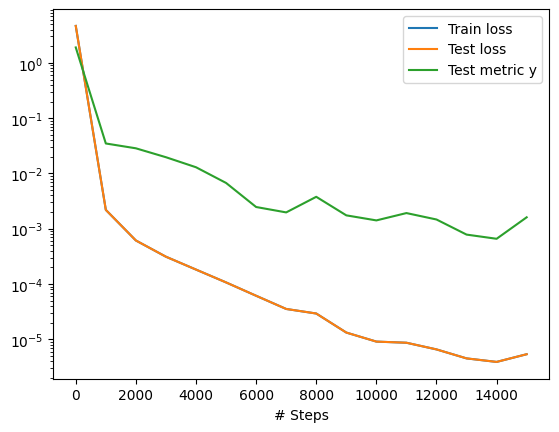

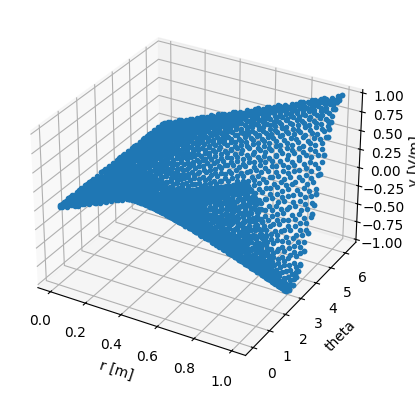

In [12]:
trainer.saveplot(issave=True, isplot=True)